In [1]:
#付録14.A
#!/usr/bin/env python
# -*- coding: shift_jis -*-
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, date
import pandas as pd
import csv
import numpy as np

def readcsv(file_name):
    trades=[]
    with open(file_name,'r') as f:
        series=csv.reader(f)
        n=0
        for line in series:
            trades.append([])
            for elements in line:
                trades[n].append(elements)
            n=n+1
    f.close()
    return trades

3095303
0:00:48.838629


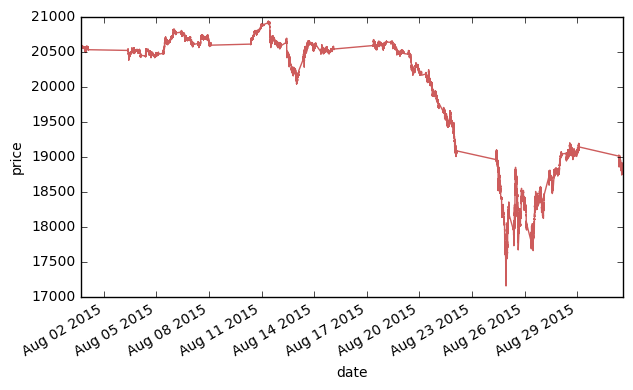

In [2]:
#付録16.A: パンローリングのティックデータの呼び込み
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
from datetime import datetime, date,timedelta
from datetime import time
import os

def readtickpan(path,yy,mm,dd):
    with open(path,'r',encoding='UTF-8') as f:
        series=csv.reader(f)
        da=[]
        price=[]
        i=0
        for line in series:
            for elements in line:
                #print(elements)
                a=elements.split('\t')#
                hhmmss=a[0]
                hms=hhmmss.split(':')#hms[0]:hour;hms[1]:minute;hms[2]:second
                
            da00=datetime(yy,mm,dd)
            if da00.weekday()==0: #月曜=0          
                da00=datetime(yy,mm,dd)+timedelta(days=-3)
            else:
                da00=datetime(yy,mm,dd)+timedelta(days=-1)
            if int(hms[0])>=16 and int(hms[0])<=23: #16:30 - 23:59:99
                dd0=da00.day
                mm0=da00.month
            if int(hms[0])>=0 and int(hms[0])<=3: #00:00 - 3:00
                da00=da00+timedelta(days=1)
                dd0=da00.day
                mm0=da00.month
            if int(hms[0])>=9 and int(hms[0])<=15: #09:00 - 15:00
                da00=datetime(yy,mm,dd)
                dd0=da00.day
                mm0=da00.month
            da0=datetime(yy,mm0,dd0,int(hms[0]),int(hms[1]),int(hms[2]))
            da.append(da0)
            price.append([])
            price[i].append(int(a[1]))
            price[i].append(int(a[2]))
            i+=1
    ts=pd.DataFrame(price,index=da,columns=["price","volume"])
    ts.index.name='date'
    return ts

def yymmddsplit(yymmdd):#日時インデックスから年、月、日に分類する関数
    yy=int(yymmdd[:2])+2000
    mm=int(yymmdd[2:4])
    dd=int(yymmdd[4:6])
    return yy,mm,dd

def dirfileget(path,date1,date0):#指定されたフォルダーにあるファイル名を取得
    list=os.listdir(path)
    lists=[]
    for i in range(len(list)):
        fname=list[i]
        date=fname[:6]
        if int(date)>=date0 and int(date)<=date1:
            lists.append(fname)
    return lists

def fileconcatpan(path,date1,date0):#date1、date2で指定された日時の間のデータを
    #data2からdeta1まで垂直に結合する。
    dates=dirfileget(path,date1,date0)
    for i in range(len(dates)):
        date=dates[i]
        fname=path+date
        date0=date[:6]
        yy,mm,dd=yymmddsplit(date0)#ファイルの年、月、日を取得
        if i==0:
            ts=readtickpan(fname,yy,mm,dd)
        else:
            ts0=readtickpan(fname,yy,mm,dd)
            ts=pd.concat([ts,ts0])
    return ts

if __name__ == "__main__":
    t1=datetime.now()
    path = "c:\\users\\moriya\\documents\\database\\pan\\n225\\TICK\\1001\\1509\\"
    entry=150803
    exit=150831
    pan=fileconcatpan(path,exit,entry)
    plt.figure(figsize=(7,4))
    pan.price.plot(color='indianred')
    plt.ylabel('price')
    plt.xlabel('date')
    #plt.savefig('1601.jpeg',dpi=1200)#グラフをjpegファイルとして保存
    #plt.savefig('1601.eps',dpi=1200)#グラフをepsファイルとして保存
    print(len(pan))
t2=datetime.now()
print(t2-t1)

In [3]:
#付録16.A_1: パンローリングのティックデータの呼び込み:12月限でーたの取得
if __name__ == "__main__":
    t1=datetime.now()
    path = "c:\\users\\moriya\\documents\\database\\pan\\n225\\TICK\\1001\\1512\\"
    pan1=fileconcatpan(path,exit,entry)
t2=datetime.now()
print(t2-t1)

0:00:01.567647


0:00:08.477848


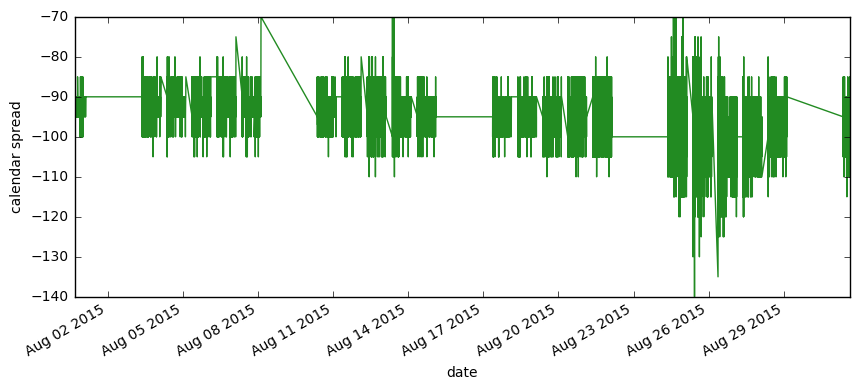

In [4]:
#付録16.B: 限月間スプレッドの特徴
if __name__ == "__main__":
    t1=datetime.now()
    tss=pan.resample('S').ohlc()
    tss1=pan1.resample('S').ohlc()
    spread=(tss1-tss).dropna()
    plt.figure(figsize=(10,4))
    spread.price.close.plot(color='forestgreen')
    plt.ylabel('calendar spread')
    plt.xlabel('date')
t2=datetime.now()
print(t2-t1)

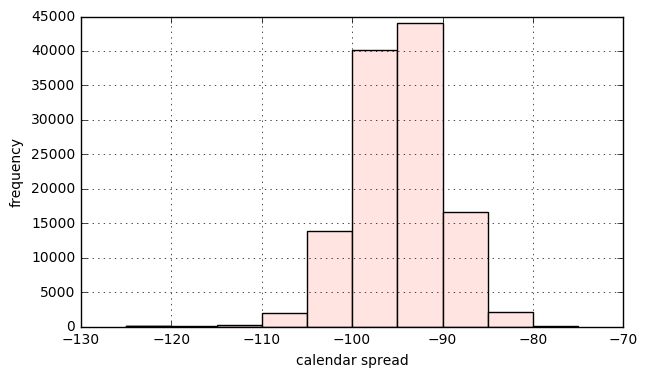

In [5]:
#付録16.B_1: 限月間スプレッドの特徴
plt.figure(figsize=(7,4))
spread.price.close.hist(bins=[x*5 for x in range(-25,-14)],color='mistyrose')
plt.ylabel('frequency')
plt.xlabel('calendar spread')

In [6]:
#付録16.B_2: 限月間スプレッドの特徴
spread=pan-pan1
print("日中立会の寄付きのスプレッド %2.2f"%\
      spread.between_time(time(9,0,0),time(9,0,2)).price.mean())
print("日中立会の平均のスプレッド   %2.2f"%\
      spread.between_time(time(9,0,0),time(15,15,2)).price.mean())
print("日中立会の引けのスプレッド   %2.2f"%\
      spread.between_time(time(15,15,0),time(15,15,2)).price.mean())
print("夜間立会の寄付きのスプレッド %2.2f"%\
      spread.between_time(time(16,30,0),time(16,30,2)).price.mean())
print("夜間立会の平均のスプレッド   %2.2f"%\
      spread.between_time(time(16,30,0),time(3,0,2)).price.mean())
print("夜間立会の引けのスプレッド   %2.2f"%\
      spread.between_time(time(3,0,0),time(3,0,2)).price.mean())

日中立会の寄付きのスプレッド 99.01
日中立会の平均のスプレッド   97.93
日中立会の引けのスプレッド   89.39
夜間立会の寄付きのスプレッド 98.92
夜間立会の平均のスプレッド   98.32
夜間立会の引けのスプレッド   91.14


0:00:55.050785


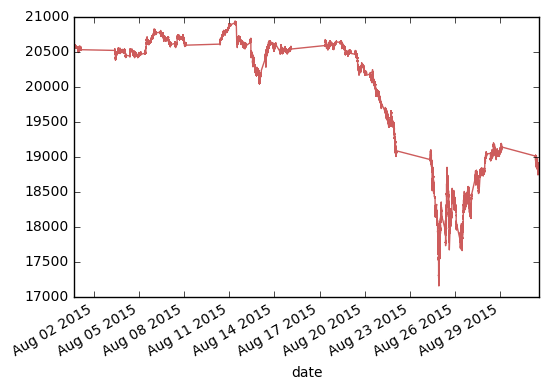

In [7]:
#付録16.C: CQGのティックデータの呼び込み：9月限
import pytz
import time
def readcsv2(file_name):
    trades=[]
    da=[]
    with open(file_name,'r') as f:
        series=csv.reader(f)
        n=0
        for line in series:
            trades.append([])
            i=0
            for elements in line:
                if i==0:
                    yymmdd=elements
                    yy=int(yymmdd[0:4])
                    mm=int(yymmdd[4:6])
                    dd=int(yymmdd[6:8])
                if i==1:
                    hhmm=elements
                    h=int(hhmm[:2])
                    m=int(hhmm[2:4])
                    da0=datetime(yy,mm,dd,h,m,0)
                    da0=da0+timedelta(hours=-10)+timedelta(days=1)
                    da.append(da0)
                if i>1:
                    trades[n].append(int(elements))              
                i+=1
            n+=1
    f.close()
    ts=pd.DataFrame(trades,index=da,columns=\
                    ["price","bid","offer","volume","ibid","ioffer"])
    ts.index.name='date'
    return ts

if __name__ == "__main__":
    t1=datetime.now()
    buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
    filename="n225m201508Sep.csv"
    file_name=buf_path0+filename
    cqg=readcsv2(file_name)
    #cqg.price.plot(color='indianred')
t2=datetime.now()#---------------------------------------------------
print(t2-t1)

In [8]:
#付録16.C_1: CQGのティックデータの呼び込み：12月限
if __name__ == "__main__":
    t1=datetime.now()
    buf_path0="C:\\users\\moriya\\documents\\Database\\n225\\tick\\"
    filename="n225m201508Dec.csv"
    file_name=buf_path0+filename
    cqg1=readcsv2(file_name)
t2=datetime.now()#---------------------------------------------------
print(t2-t1)

0:00:02.345194


In [9]:
#付録16.C_2: パンローリングのティックデータとCQGのティックデータの結合：9月限
def yymmddhms_split(data,i):
    timeindex=data.index[i]
    yy=int(timeindex.year)
    mm=int(timeindex.month)
    dd=int(timeindex.day)
    h=int(timeindex.hour)
    m=int(timeindex.minute)
    ss=int(timeindex.second)
    da=datetime(yy,mm,dd,h,m,ss)
    da0=datetime(yy,mm,dd,h,m,0)
    da1=da0+timedelta(minutes=1)
    return da,da0,da1

def fileconcat_pan_cqg(pan,cqg):
    j0=0
    daaa=[]
    data=[]
    update=False
    n=0
    ii=0
    print(len(pan))
    for i in range(len(pan)):
        da,da0,da1=yymmddhms_split(pan,i)
        p=pan.price.iloc[i]
        v=pan.volume.iloc[i]
        j=j0
        while not update:
            daa,daa0,daa1=yymmddhms_split(cqg,j)
            pp=cqg.price.iloc[i]
            vv=cqg.volume.iloc[i]
            b=cqg.bid.iloc[i]
            o=cqg.offer.iloc[i]
            io=cqg.ibid.iloc[i]
            ib=cqg.ioffer.iloc[i]
            if da0==daa0 and pp==p and vv==v and not update:#データの照合     
                j0=j
                update=True
                break
            if daa>=da1:#
                j0=j
                break
            j+=1
        if update:#データの更新
            daaa.append(da)
            data.append([])
            data[n].append(pp)
            data[n].append(b)
            data[n].append(o)
            data[n].append(vv)
            data[n].append(ib)
            data[n].append(io)
            update=False
            n+=1
        ii+=1
    ts=pd.DataFrame(data,index=daaa,columns=\
                    ['price','bid','offer','volume','ibid','ioffer'])
    ts.index.name='date'
    return ts
  
if __name__ == "__main__":
    t1=datetime.now()
    ts=fileconcat_pan_cqg(pan,cqg)
t2=datetime.now()#---------------------------------------------------
print(t2-t1)

3095303
0:13:06.281971


In [10]:
#付録16.C_3: パンローリングのティックデータとCQGのティックデータの結合：12月限
if __name__ == "__main__":
    t1=datetime.now()
    ts1=fileconcat_pan_cqg(pan1,cqg1)
t2=datetime.now()#---------------------------------------------------
print(t2-t1)

207577
0:00:52.608392


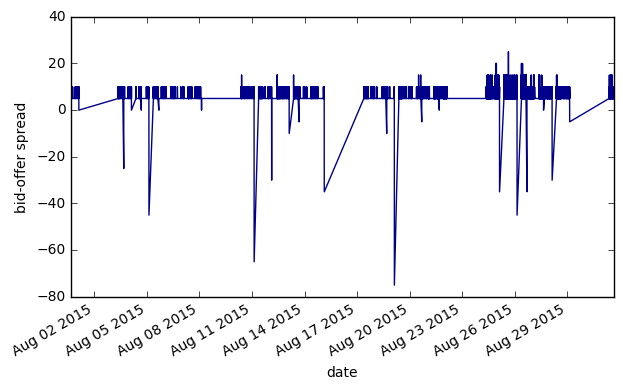

In [11]:
#付録16.D: 9月限の売買スプレッド
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(ts.offer-ts.bid).dropna()
    plt.figure(figsize=(7,4))
    indicativespread.plot(color='darkblue')
    plt.ylabel('bid-offer spread')
    plt.xlabel('date')

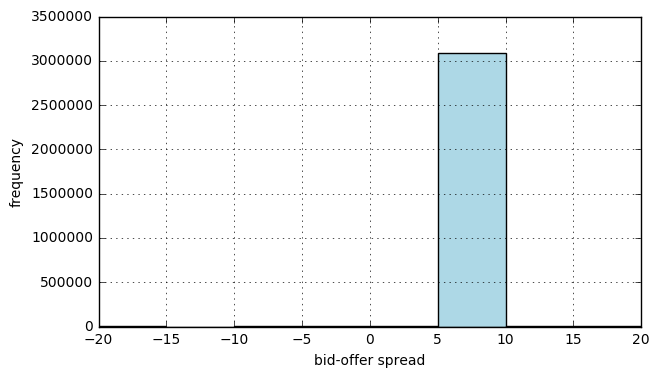

In [12]:
#付録16.D_1: 9月限の売買スプレッド-頻度図
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(ts.offer-ts.bid).dropna()
    plt.figure(figsize=(7,4))
    indicativespread.hist(bins=[-20,-15,-10,-5,0,5,10,15,20],color='lightblue')
    plt.xlabel('bid-offer spread')
    plt.ylabel('frequency')

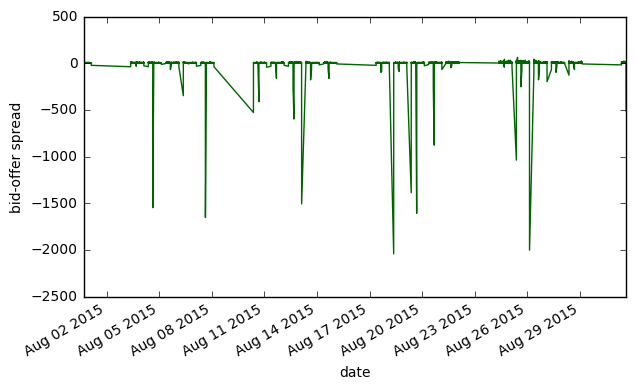

In [13]:
#付録16.D_2: 12月限の売買スプレッド
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(ts1.offer-ts1.bid).dropna()
    plt.figure(figsize=(7,4))
    indicativespread.plot(color='darkgreen')
    plt.ylabel('bid-offer spread')
    plt.xlabel('date')

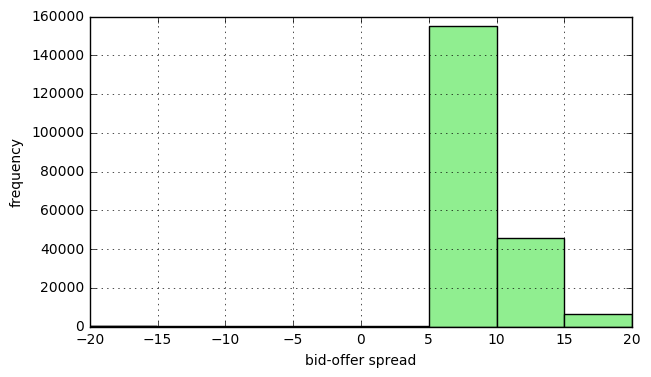

In [14]:
#付録16.D_3: 12月限の売買スプレッド-頻度図
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(ts1.offer-ts1.bid).dropna()
    plt.figure(figsize=(7,4))
    indicativespread.hist(bins=[-20,-15,-10,-5,0,5,10,15,20],color='lightgreen')
    plt.ylabel('frequency')
    plt.xlabel('bid-offer spread')

In [15]:
#付録16.E 2つの限月の先物のデータを結合
def yymmddhms_split(data,i):
    timeindex=data.index[i]
    yy=int(timeindex.year)
    mm=int(timeindex.month)
    dd=int(timeindex.day)
    h=int(timeindex.hour)
    m=int(timeindex.minute)
    ss=int(timeindex.second)
    da=datetime(yy,mm,dd,h,m,ss)
    da0=datetime(yy,mm,dd,h,m,0)
    da1=da0+timedelta(minutes=1)
    return da,da0,da1

def fileconcat_pan1_pan2(ts,ts1):
    j0=0
    d=[]
    data=[]
    n=0
    print("期近のデータ数",len(ts),"期先のデータ数",len(ts1))
    lents1=len(ts1)
    #multi=float(len(ts))/float(len(ts1))
    ii=0
    for i in range(len(ts)): #期近のデータの取得
        da,da0,da1=yymmddhms_split(ts,i)
        trade=[None]*12
        update=False
        trade[0]=ts.price.iloc[i]
        trade[1]=ts.bid.iloc[i]
        trade[2]=ts.offer.iloc[i]
        trade[3]=ts.volume.iloc[i]
        trade[4]=ts.ibid.iloc[i]
        trade[5]=ts.ioffer.iloc[i]
        j=j0
        while not update: #期先のデータの取得
            daa,daa0,daa1=yymmddhms_split(ts1,j)
            #print da,daa,trade[0],trade[6],i,j,j0
            if daa==da:
                trade[6]=ts1.price.iloc[j]
                trade[7]=ts1.bid.iloc[j]
                trade[8]=ts1.offer.iloc[j]
                trade[9]=ts1.volume.iloc[j]
                trade[10]=ts1.ibid.iloc[j]
                trade[11]=ts1.ioffer.iloc[j]
                j0=j+1
                if j0>lents1-1:
                    j0=lents1-1
                update=True
                break
            if daa>da:
                j0=j
                break
            j+=1
        if not update:
            d.append(da)
            data.append([])
            for j in range(6):
                data[n].append(trade[j])
            for j in range(6,12):
                data[n].append(None)
            n+=1   
        else:
            if da==daa:
                d.append(da)
                data.append([])
                for j in range(12):
                    data[n].append(trade[j])
                update=False
            n+=1   
        ii+=1
    ts2=pd.DataFrame(data,index=d)
    #期近のデータには列の名前の最後に番号が無し、期先のデータには列の名前の最後に1がある。
    ts2.columns=['price','bid','offer','volume','ibid','ioffer','price1',\
                 'bid1','offer1','volume1','ibid1','ioffer1']
    ts2.index.name='date'
    #ts2=ts2.fillna(method='ffill')#NaNをその前のデータで埋める。
    return ts2

if __name__ == "__main__":
    t1=datetime.now()
    tsts=fileconcat_pan1_pan2(ts,ts1)

t2=datetime.now()#---------------------------------------------------
print(t2-t1)

期近のデータ数 3095303 期先のデータ数 207575
0:06:34.644966


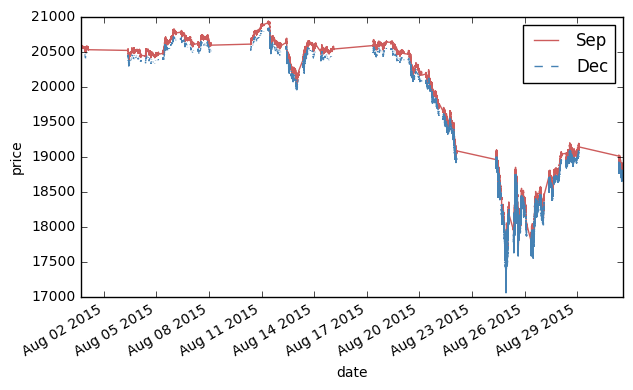

In [16]:
#付録16.E 2つの限月の先物のデータを結合ーグラフ表示
if __name__ == "__main__":
    t1=datetime.now()
    plt.figure(figsize=(7,4))
    tsts.price.plot(label="Sep",color='indianred')
    tsts.price1.plot(linestyle="dashed",label="Dec",color='steelblue')    
    plt.ylabel('price')
    plt.xlabel('date')
    plt.legend()

In [18]:
#付録16.F 2つの限月を含むデータベースの立会データの取得
def sessiondata2(tsts,i,yymmdd,hh,mm):
    j=0
    test=False
    tstsnew={}
    forward=i
    if hh==9:
        #print hh,i
        while not test:
            yymmdd0=tsts.index[i+j]
            hh=yymmdd0.hour
            mm=yymmdd0.minute
            if hh>=15 and mm>=10:
                forward=i+j
                #print yymmdd0,j,hh,mm,i
                test=True
                tstsnew=tsts.iloc[i:i+j]
                break
            j+=1
    if hh==16 and mm==30:
        #print hh,mm,i
        while not test:
            yymmdd0=tsts.index[i+j]
            hh=yymmdd0.hour
            mm=yymmdd0.minute
            if yymmdd0>yymmdd and hh>=2 and mm>=55:
                forward=i+j
                #print yymmdd0,j,hh,mm,i
                test=True
                tstsnew=tsts.iloc[i:i+j]
                break
            j+=1
    return tstsnew,forward

2015-07-31 16:30:00
213 588
0:02:34.307120


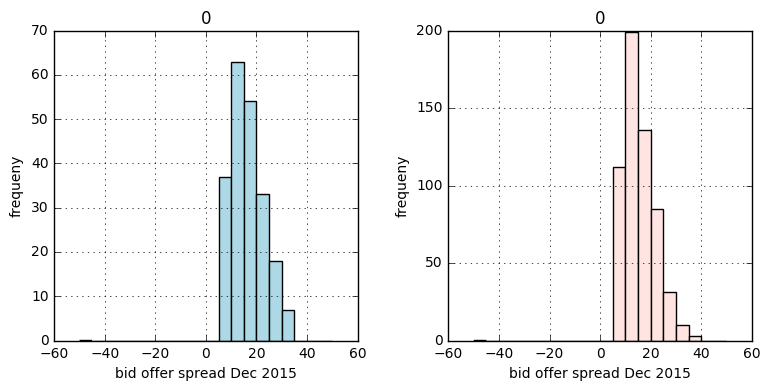

In [19]:
#付録16.G スプレッドを条件として期先の売買スプレッドの傾向
def liquidity_provider(tsts):
    imax=len(tsts)
    yymmdd0=tsts.index[0]
    forward=0
    print(yymmdd0)
    sp1=[]
    sp2=[]
    for i in range(imax):
        yymmdd=tsts.index[i]
        hh=yymmdd.hour
        mm=yymmdd.minute
        if i>forward:
            tstsnew,forward=sessiondata2(tsts,i,yymmdd,hh,mm)
            if hh==9 or (hh==16 and mm==30):
                jmax=len(tstsnew)
                for j in range(jmax):
                    yymmdd0=tstsnew.index[j]
                    hh0=yymmdd0.hour
                    mm0=yymmdd.minute
                    trade=tstsnew.price.iloc[j]
                    trade1=tstsnew.price1.iloc[j]
                    offer1=tstsnew.offer1.iloc[j]
                    bid1=tstsnew.bid1.iloc[j]
                    spread=trade-trade1 #限月間スプレッド
                    bos=offer1-bid1 #売買スプレッド
                    if spread==80:
                        sp1.append(bos)
                        #print spread,bos,yymmdd0,hh0,mm0
                    if spread==115:
                        #print spread,bos,yymmdd0,hh0,mm0
                        sp2.append(bos)
                #print hh,mm
                forward=forward
    sp1=pd.DataFrame(sp1)
    sp2=pd.DataFrame(sp2)
    return sp1,sp2
                
if __name__ == "__main__":
    t1=datetime.now()
    sp1,sp2=liquidity_provider(tsts)
    plt.figure(figsize=(9,4))
    ax=plt.subplot(121)
    sp1.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='lightblue')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    ax=plt.subplot(122)
    sp2.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='mistyrose')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    print(len(sp1),len(sp2))
    t2=datetime.now()#---------------------------------------------------
print(t2-t1)

2015-07-31 16:30:00
2093 2591
0:02:34.189371


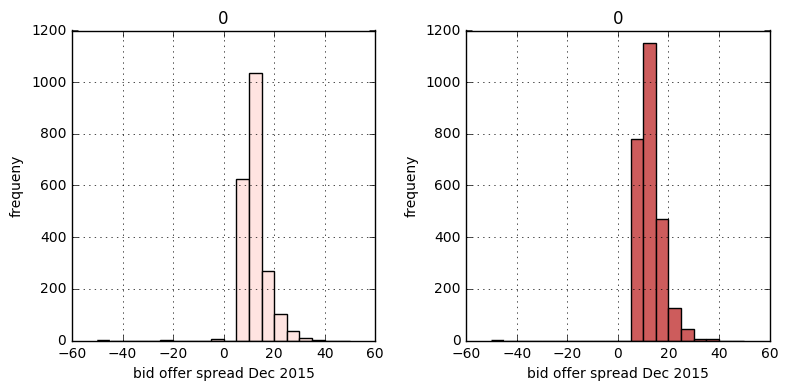

In [20]:
#付録16.G_1 スプレッドを条件として期先の売買スプレッドの傾向
def liquidity_provider(tsts):
    imax=len(tsts)
    yymmdd0=tsts.index[0]
    forward=0
    print(yymmdd0)
    sp1=[]
    sp2=[]
    for i in range(imax):
        yymmdd=tsts.index[i]
        hh=yymmdd.hour
        mm=yymmdd.minute
        if i>forward:
            tstsnew,forward=sessiondata2(tsts,i,yymmdd,hh,mm)
            if hh==9 or (hh==16 and mm==30):
                jmax=len(tstsnew)
                for j in range(jmax):
                    yymmdd0=tstsnew.index[j]
                    hh0=yymmdd0.hour
                    mm0=yymmdd.minute
                    trade=tstsnew.price.iloc[j]
                    trade1=tstsnew.price1.iloc[j]
                    offer1=tstsnew.offer1.iloc[j]
                    bid1=tstsnew.bid1.iloc[j]
                    spread=trade-trade1 #限月間スプレッド
                    bos=offer1-bid1 #売買スプレッド
                    if spread==85:
                        sp1.append(bos)
                        #print spread,bos,yymmdd0,hh0,mm0
                    if spread==110:
                        #print spread,bos,yymmdd0,hh0,mm0
                        sp2.append(bos)
                #print hh,mm
                forward=forward
    sp1=pd.DataFrame(sp1)
    sp2=pd.DataFrame(sp2)
    return sp1,sp2
                
if __name__ == "__main__":
    t1=datetime.now()
    sp1,sp2=liquidity_provider(tsts)
    plt.figure(figsize=(9,4))
    ax=plt.subplot(121)
    sp1.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='mistyrose')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    ax=plt.subplot(122)
    sp2.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='indianred')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    print(len(sp1),len(sp2))
    t2=datetime.now()#---------------------------------------------------
print(t2-t1)

2015-07-31 16:30:00
13131 11517
0:02:34.114336


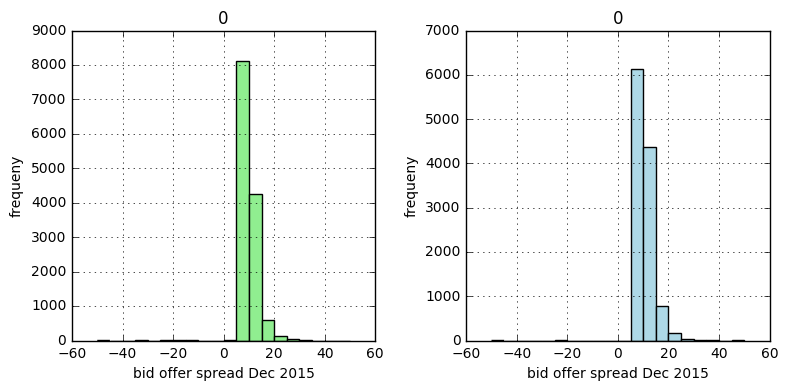

In [21]:
#付録16.G_2 スプレッドを条件として期先の売買スプレッドの傾向
def liquidity_provider(tsts):
    imax=len(tsts)
    yymmdd0=tsts.index[0]
    forward=0
    print(yymmdd0)
    sp1=[]
    sp2=[]
    for i in range(imax):
        yymmdd=tsts.index[i]
        hh=yymmdd.hour
        mm=yymmdd.minute
        if i>forward:
            tstsnew,forward=sessiondata2(tsts,i,yymmdd,hh,mm)
            if hh==9 or (hh==16 and mm==30):
                jmax=len(tstsnew)
                for j in range(jmax):
                    yymmdd0=tstsnew.index[j]
                    hh0=yymmdd0.hour
                    mm0=yymmdd.minute
                    trade=tstsnew.price.iloc[j]
                    trade1=tstsnew.price1.iloc[j]
                    offer1=tstsnew.offer1.iloc[j]
                    bid1=tstsnew.bid1.iloc[j]
                    spread=trade-trade1 #限月間スプレッド
                    bos=offer1-bid1 #売買スプレッド
                    if spread==90:
                        sp1.append(bos)
                        #print spread,bos,yymmdd0,hh0,mm0
                    if spread==105:
                        #print spread,bos,yymmdd0,hh0,mm0
                        sp2.append(bos)
                #print hh,mm
                forward=forward
    sp1=pd.DataFrame(sp1)
    sp2=pd.DataFrame(sp2)
    return sp1,sp2
                
if __name__ == "__main__":
    t1=datetime.now()
    sp1,sp2=liquidity_provider(tsts)
    plt.figure(figsize=(9,4))
    ax=plt.subplot(121)
    sp1.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='lightgreen')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    ax=plt.subplot(122)
    sp2.hist(bins=[x*5 for x in range(-10,11)],ax=ax,color='lightblue')
    plt.xlabel('bid offer spread Dec 2015')
    plt.ylabel('frequeny')
    print(len(sp1),len(sp2))
    t2=datetime.now()#---------------------------------------------------
print(t2-t1)

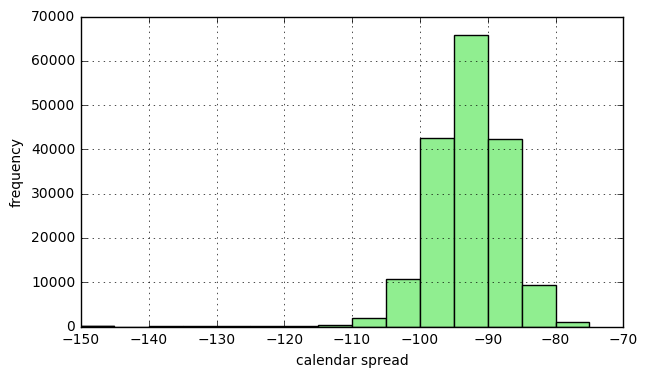

In [22]:
#付録16.H: 気配値を用いた限月間スプレッドの性質:スプレッドの買い-頻度図
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(tsts.price1-tsts.bid)
    plt.figure(figsize=(7,4))
    indicativespread.hist(bins=[x*5 for x in range(-30,-14)],color='lightgreen')
    plt.ylabel('frequency')
    plt.xlabel('calendar spread')

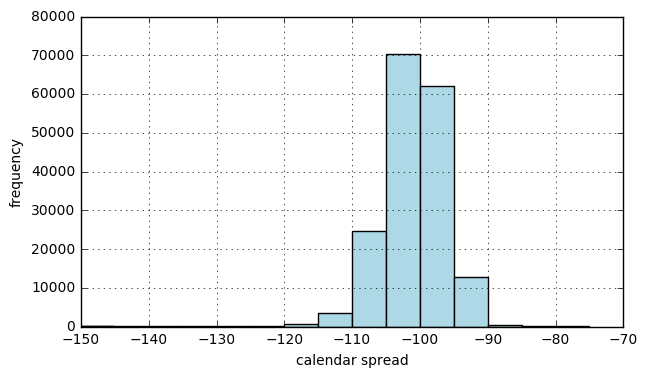

In [23]:
#付録16.H: 気配値を用いた限月間スプレッドの性質:スプレッドの売り-頻度図
if __name__ == "__main__":
    t1=datetime.now()
    indicativespread=(tsts.bid1-tsts.offer)
    plt.figure(figsize=(7,4))
    indicativespread.hist(bins=[x*5 for x in range(-30,-14)],color='lightblue')
    plt.ylabel('frequency')
    plt.xlabel('calendar spread')

2015-07-31 16:30:00
0
0:05:41.149049


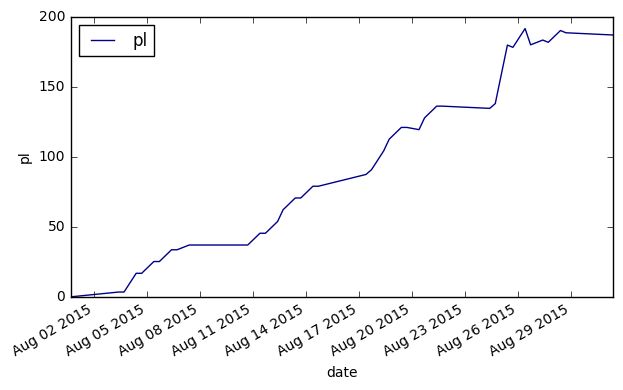

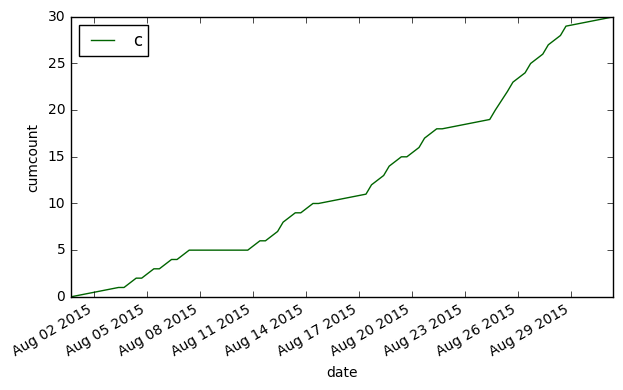

In [24]:
#限月間スプレッド：スプレッドの売り戦略
def liquidity_provider1(tsts):
    imax=len(tsts)
    yymmdd0=tsts.index[0]
    forward=0
    print(yymmdd0)
    da=[]
    data=[]
    cnt=[]
    comm=0.8
    gpl=0
    for i in range(imax):
        yymmdd=tsts.index[i]
        hh=yymmdd.hour
        mm=yymmdd.minute
        if i>forward:
            tstsnew,forward=sessiondata2(tsts,i,yymmdd,hh,mm)
            #bid00=0
            bid10=0
            tradeS=0
            tradeB=0
            #qb=0
            qb1=0
            pl=0
            count=0
            if hh==9 or (hh==16 and mm==30):
                jmax=len(tstsnew)
                for j in range(jmax):
                    yymmdd0=tstsnew.index[j]
                    hh0=yymmdd0.hour
                    mm0=yymmdd.minute
                    trade=tstsnew.price.iloc[j]
                    bid=tstsnew.bid.iloc[j]
                    offer=tstsnew.offer.iloc[j]
                    volume=tstsnew.volume.iloc[j]
                    ibid=tstsnew.ibid.iloc[j]
                    ioffer=tstsnew.ioffer.iloc[j]
                    
                    trade1=tstsnew.price1.iloc[j]
                    bid1=tstsnew.bid1.iloc[j]
                    offer1=tstsnew.offer1.iloc[j]
                    volume1=tstsnew.volume1.iloc[j]
                    ibid1=tstsnew.ibid1.iloc[j]
                    spread=trade1-bid #限月間スプレッド
                    #-----------スプレッドの買い、仕掛け
                    SP=-100
                    if spread==SP and bid10==0 and tradeB==0 and \
                    tradeS==0 and bid1>0:#期先買指値の発注
                        bid10=bid1
                        qb1=ibid1                    
                    if bid10!=0 and (spread>SP) :#注文取消し
                        bid10=0
                    if trade1==bid10 and tradeB==0 and tradeS==0 and \
                    qb1>0:#待ち行列の減少
                        qb1-=volume1
                    if trade1==bid10 and qb1<=0 and tradeB==0 and tradeS==0 \
                    and bid>0:#注文約定：順番到来
                        tradeB=bid10#期先先物、売指値注文の約定
                        tradeS=bid#期近先物、最良買気配への即時執行買指値注文の約定
                        qb1=0
                        count+=1
                    if trade1>bid10>0 and tradeB==0 and tradeS==0 and bid>0:
                        #価格の動きによる注文の約定
                        tradeB=bid10#期先先物、売指値注文の約定
                        tradeS=bid#期近先物、最良買気配への即時執行買指値注文の約定
                        qb1=0
                        count+=1
                    #-------------スプレッドの売り、仕切り
                    if bid1-offer==-80 and tradeS!=0 and tradeB!=0:#利食い
                        pl1=(tradeS-offer)-comm#期近先物：買玉の仕切り
                        pl2=(bid1-tradeB)-comm-5#期先先物：売玉の仕切り
                        pl+=pl1+pl2
                        tradeS=0
                        tradeB=0
                        bid10=0
                        offer00=0
                    if trade1>0:
                        trade111=trade1
                #------------------引けで仕切る
                if tradeS!=0 and tradeB!=0:#手仕舞い
                    pl+=(trade111-tradeB)-comm#期先先物:売玉の仕切り
                    pl+=(tradeS-trade)-comm#期近先物：買玉の仕切り
                    tradeS=0
                    tradeB=0
                    #print "market on close"
                gpl+=pl    
                forward=forward
                da.append(yymmdd)
                data.append(pl)
                cnt.append(count)
                #print yymmdd,hh,mm,pl,count,gpl
    ts=pd.DataFrame(data,index=da,columns=['pl'])
    ts2=pd.DataFrame(cnt,index=da,columns=['c'])
    print(count)
    return ts,ts2
                
if __name__ == "__main__":
    t1=datetime.now()
    ts,ts2=liquidity_provider1(tsts)
    plt.figure(figsize=(7,4))
    ts.cumsum().pl.plot(color='darkblue')
    plt.ylabel('pl')
    plt.xlabel('date')
    plt.legend(loc='upper left')
    plt.figure(figsize=(7,4))
    ts2.c.cumsum().plot(color='darkgreen')
    plt.ylabel('cumcount')
    plt.xlabel('date')
    plt.legend(loc='upper left')
    t2=datetime.now()#---------------------------------------------------
print(t2-t1)